# DACON 해외 축구 선수 이적료 예측
## EDA
### 데이터 셋
[DACON](https://dacon.io/competitions/open/235538/data)  

### 사용 라이브러리

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import glob

### Data Load

In [2]:
path = glob.glob("data/*")
path

['data\\FIFA_test.csv', 'data\\FIFA_train.csv', 'data\\submission.csv']

In [3]:
train = pd.read_csv(path[1])
test = pd.read_csv(path[0])

train.shape, test.shape

((8932, 12), (3828, 11))

### EDA
#### 기본 정보

In [4]:
display(train.head())
display(test.head())

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


(출처: 데이콘)
- id : 선수 고유의 아이디
- name : 이름
- age : 나이
- continent : 선수들의 국적이 포함되어 있는 대륙입니다
- contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
- position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
- prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
- reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
- stat_overall : 선수의 현재 능력치 입니다.
- stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
- stat_skill_moves : 선수의 개인기 능력치 입니다.
- value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [6]:
train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [7]:
train.describe(include="object")

,name,continent,contract_until,position,prefer_foot
count,8932,8932,8932,8932,8932
unique,8932,5,17,4,2
top,L. Messi,europe,2019,MF,right
freq,1,5322,2366,3428,6837


`value`의 경우 단위가 너무 크므로 log 스케일을 적용

In [8]:
train["value_log"] = np.log1p(train["value"])

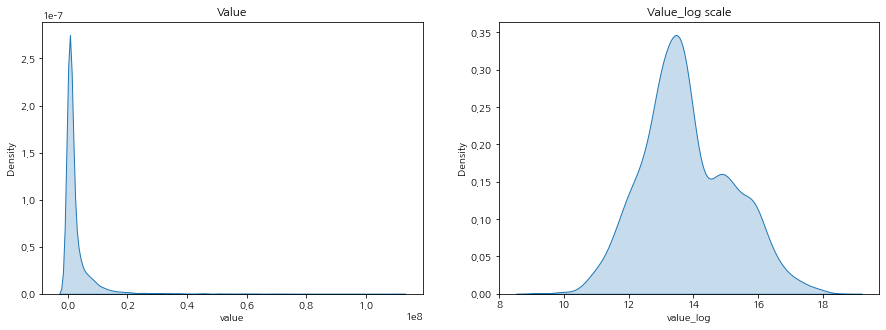

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

_ = sns.kdeplot(data=train, x="value", shade=True, ax=ax[0]).set_title("Value")
_ = sns.kdeplot(data=train, x="value_log", shade=True, ax=ax[1]).set_title("Value_log scale")

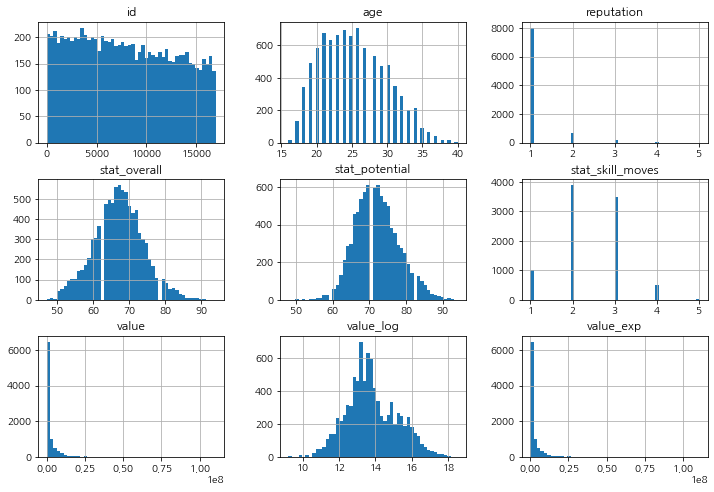

In [10]:
_ = train.hist(bins=50, figsize=(12, 8))

In [11]:
# 이산형
nums = ["age", "stat_overall", "stat_potential", "value_log"]
# 범주형
noms = ["continent", "position", "prefer_foot", "reputation", "stat_skill_moves"]

#### 결측치

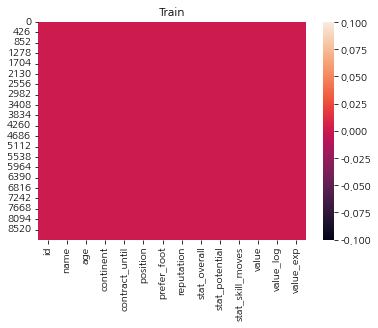

In [12]:
_ = sns.heatmap(train.isnull()).set_title("Train")

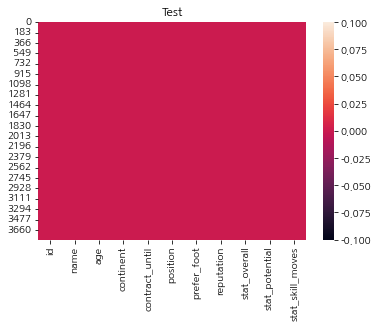

In [13]:
_ = sns.heatmap(test.isnull()).set_title("Test")

### 시각화

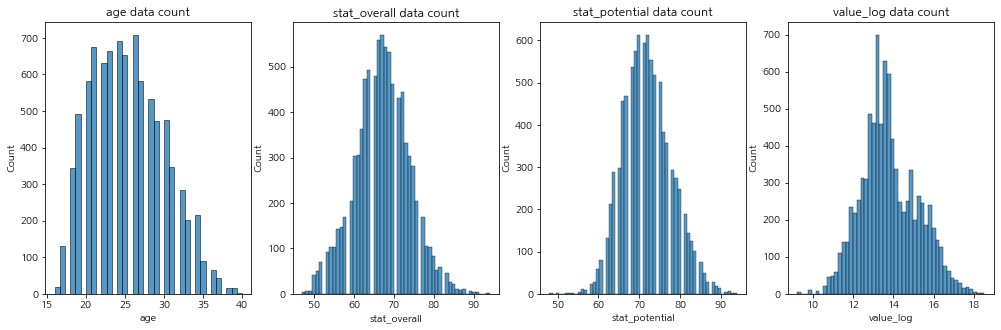

In [14]:
fig, ax = plt.subplots(1, len(nums), figsize=(17, 5))

for col, ax in zip(nums, ax):
    _ = sns.histplot(data=train, x=col, ax=ax).set_title(f"{col} data count")

32세 이상일 경우 노장이라고 한다고 함

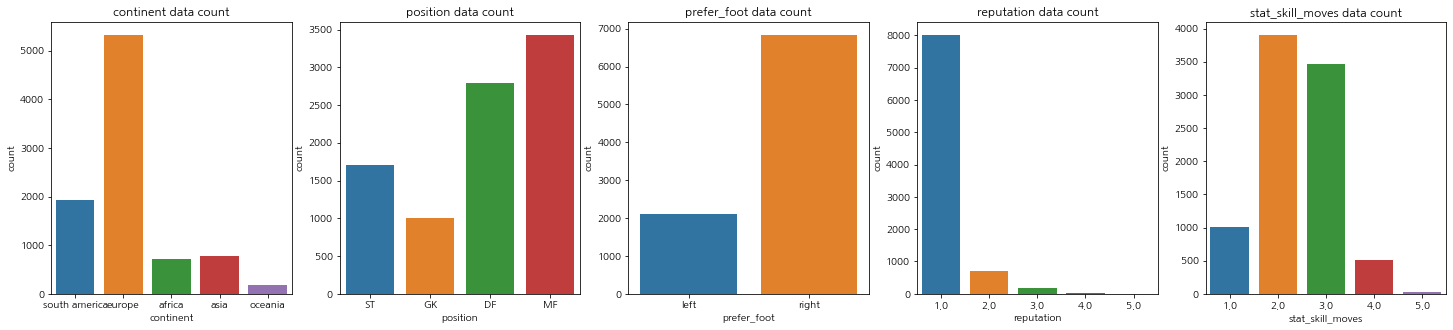

In [15]:
fig, ax = plt.subplots(1, len(noms), figsize=(25, 5))

for col, ax in zip(noms, ax):
    _ = sns.countplot(data=train, x=col, ax=ax).set_title(f"{col} data count")

#### 상관 관계

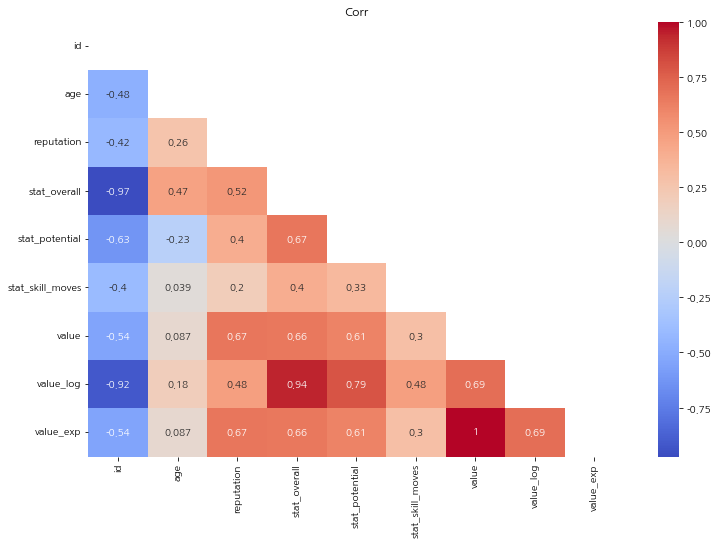

In [16]:
plt.figure(figsize=(12, 8))
_ = sns.heatmap(train.corr(), cmap="coolwarm", annot=True, mask=np.triu(np.ones_like(train.corr()))).set_title("Corr")

이적료와 상관이 높은 변수는 `requtation(유명도), stat_overall(현재 능력치), stat_potential(성장 가능성)`이라고 생각 할 수 있음  

등번호가 낮을수록 현재 능력치나 유명도, 이적료 등이 높다고 생각할 수 도 있었음

#### 이상치 탐색

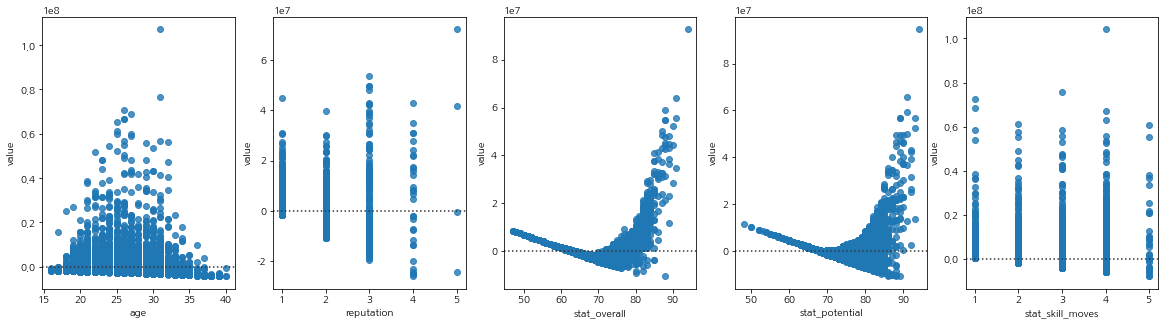

In [17]:
cols = ["age", "reputation", "stat_overall", "stat_potential", "stat_skill_moves"]
fig, ax = plt.subplots(1, len(cols), figsize=(20, 5))
ax.flatten()

for col, ax in zip(cols, ax):
    _ = sns.residplot(data=train, x=col, y="value", ax=ax)

### 전처리

In [18]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,value_log,value_exp
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,18.520526,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,18.092177,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,18.197537,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,17.747336,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,18.035018,68000000.0


#### 범주형 데이터 -> 수치형 데이터

In [19]:
to_dummy = ["continent", "position", "prefer_foot"]

In [20]:
train_dummy = []
test_dummy = []
for col in to_dummy:
    train_dummy.append(pd.get_dummies(train[col], drop_first=True))
    test_dummy.append(pd.get_dummies(test[col], drop_first=True))

In [21]:
train.drop(columns=to_dummy, inplace=True)
temp = pd.concat(train_dummy, axis=1)
train = pd.concat([train, temp], axis=1)

In [23]:
test.drop(columns=to_dummy, inplace=True)
temp = pd.concat(test_dummy, axis=1)
test = pd.concat([test, temp], axis=1)

In [25]:
display(train.head())
display(test.head())

,id,name,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,value,value_log,value_exp,asia,europe,oceania,south america,GK,MF,ST,right
0,0,L. Messi,31,2021,5.0,94,94,4.0,110500000.0,18.520526,110500000.0,0,0,0,1,0,0,1,0
1,3,De Gea,27,2020,4.0,91,93,1.0,72000000.0,18.092177,72000000.0,0,1,0,0,1,0,0,1
2,7,L. Suárez,31,2021,5.0,91,91,3.0,80000000.0,18.197537,80000000.0,0,0,0,1,0,0,1,1
3,8,Sergio Ramos,32,2020,4.0,91,91,3.0,51000000.0,17.747336,51000000.0,0,1,0,0,0,0,0,1
4,9,J. Oblak,25,2021,3.0,90,93,1.0,68000000.0,18.035018,68000000.0,0,1,0,0,1,0,0,1


,id,name,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,asia,europe,oceania,south america,GK,MF,ST,right
0,1,Cristiano Ronaldo,33,2022,5.0,94,94,5.0,0,1,0,0,0,0,1,1
1,2,Neymar Jr,26,2022,5.0,92,93,5.0,0,0,0,1,0,0,1,1
2,4,K. De Bruyne,27,2023,4.0,91,92,4.0,0,1,0,0,0,1,0,1
3,5,E. Hazard,27,2020,4.0,91,91,4.0,0,1,0,0,0,0,1,1
4,6,L. Modrić,32,2020,4.0,91,91,4.0,0,1,0,0,0,1,0,1


In [26]:
train.to_csv("data/pre_train.csv", index=False)
test.to_csv("data/pre_test.csv", index=False)